   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

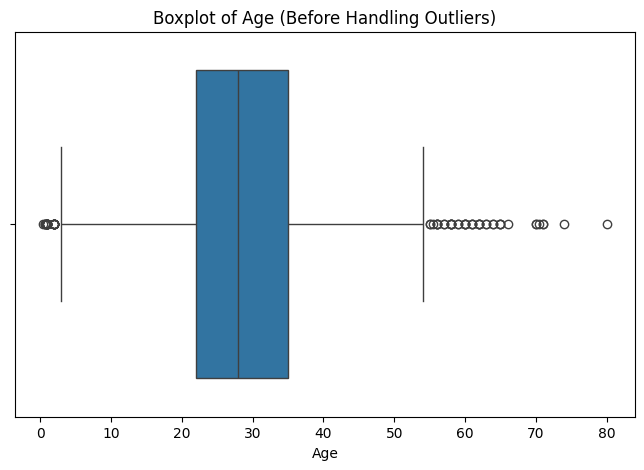

/tmp/ipython-input-4852351.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


<Figure size 1000x800 with 0 Axes>

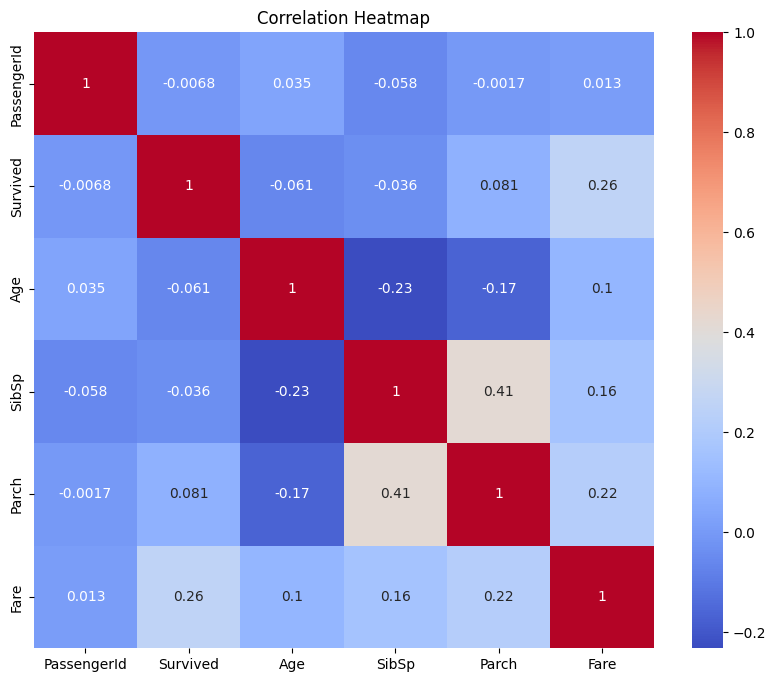

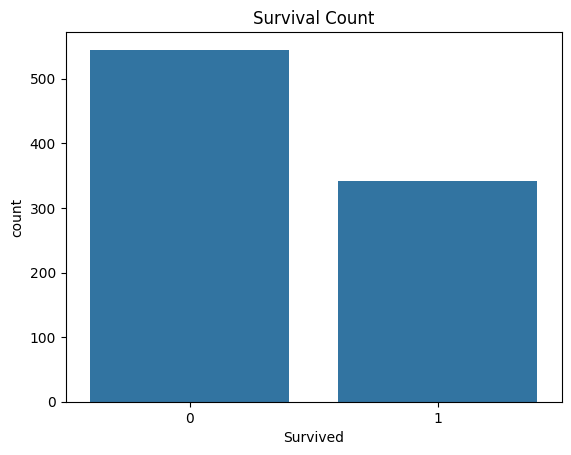


Cleaned dataset saved as 'cleaned_titanic_data.csv'


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (Titanic Dataset)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# View Dataset Info
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Handling Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' (too many missing values)
df = df.drop(columns=['Cabin'])

# Step 4: Handle Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

# Step 5: Data Type Corrections
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Step 6: Encoding Categorical Variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Step 7: Outlier Detection (Visualize)
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age (Before Handling Outliers)")
plt.show()

# Remove Age outliers above 70
df = df[df['Age'] <= 70]

# Step 8: Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Step 9: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Countplot of Survival
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Step 10: Save Cleaned Dataset
df.to_csv('cleaned_titanic_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_titanic_data.csv'")
